## Exercise 1

### Question 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gayr = pd.read_csv('gayreshaped.csv')
gayr.head()

,study,treatment,therm1,therm2,therm3,therm4
0,1,No Contact,91,91.0,NaN,NaN
1,1,No Contact,72,72.0,NaN,NaN
2,1,No Contact,69,69.0,NaN,NaN
3,1,No Contact,51,51.0,NaN,NaN
4,1,Recycling Script by Gay Canvasser,50,48.0,NaN,NaN


In [3]:
# What is the correlation between respondents’ feeling thermometer ratings in waves 1 and 2
# for the control group in study 1?
gayr.loc[gayr['study'] == 1, 'therm1'].corr(gayr.loc[gayr['study'] == 1, 'therm2'])

0.9953129748236864

### Question 2

In [4]:
# Repeat the previous question using study 2 and comparing all waves within the control group.
df = gayr.loc[(gayr['study'] == 2) & (gayr['treatment'] == 'No Contact')]
df.head()

,study,treatment,therm1,therm2,therm3,therm4
12,2,No Contact,2,6.0,0.0,6.0
13,2,No Contact,91,90.0,100.0,93.0
31,2,No Contact,46,67.0,38.0,46.0
75,2,No Contact,6,0.0,NaN,16.0
80,2,No Contact,100,100.0,100.0,100.0


In [5]:
df.iloc[:, 2:].corr()

,therm1,therm2,therm3,therm4
therm1,1.000000,0.973445,0.959408,0.970902
therm2,0.973445,1.000000,0.930829,0.943662
therm3,0.959408,0.930829,1.000000,0.934325
therm4,0.970902,0.943662,0.934325,1.000000


### Question 3

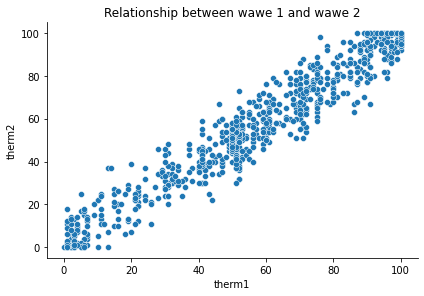

In [6]:
# Create a scatter plot to visualize the relationships between wave 1 
# and each of the subsequent waves in study 2. Use only the control group.

# Relationship between wawe 1 and wawe 2
sns.relplot(
    data=df,
    x='therm1', y='therm2',
    height=4, aspect=1.5,
).set(title='Relationship between wawe 1 and wawe 2', 
      xlabel='therm1', ylabel='therm2')

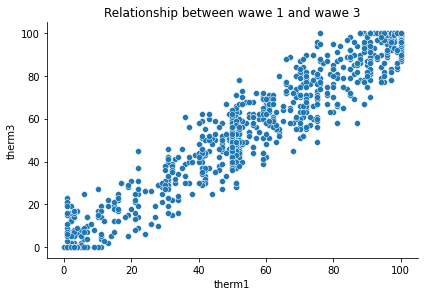

In [7]:
# Relationship between wawe 1 and wawe 3
sns.relplot(
    data=df,
    x='therm1', y='therm3',
    height=4, aspect=1.5,
).set(title='Relationship between wawe 1 and wawe 3', 
      xlabel='therm1', ylabel='therm3')

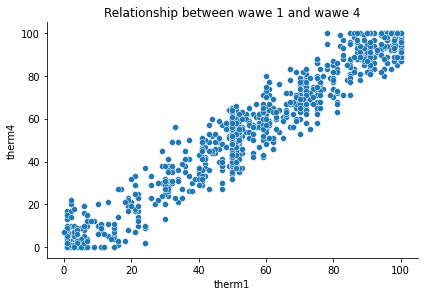

In [8]:
# Relationship between wawe 1 and wawe 4
sns.relplot(
    data=df,
    x='therm1', y='therm4',
    height=4, aspect=1.5,
).set(title='Relationship between wawe 1 and wawe 4', 
      xlabel='therm1', ylabel='therm4')

### Question 4

In [9]:
# Create a histogram of the 2012 CCAP feeling thermometer, the wave-1 feeling
# thermometer from study 1, and the wave-1 feeling thermometer from study 2.

ccap = pd.read_csv('ccap2012.csv')
ccap.head()

,Unnamed: 0,caseid,gaytherm
0,1,328,50.0
1,2,324,95.0
2,3,100,16.0
3,4,584,50.0
4,5,63,58.0


Text(55, 0.05, 'median')

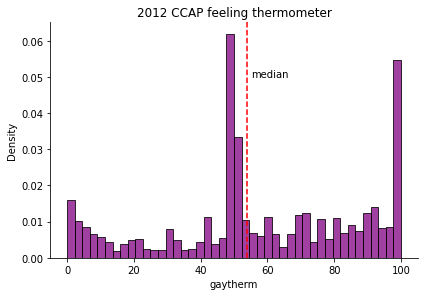

In [10]:
# Create a histogram of the 2012 CCAP feeling thermometer

sns.displot(
    data=ccap, x='gaytherm', stat='density', color='purple',
    height=4, aspect=1.5
).set(title='2012 CCAP feeling thermometer', xlabel='gaytherm')

# add a vertical line representing the median
plt.axvline(x=ccap['gaytherm'].median(), color='red', linestyle='--')

# add a text label for the median
plt.text(x=55, y=0.05, s='median')

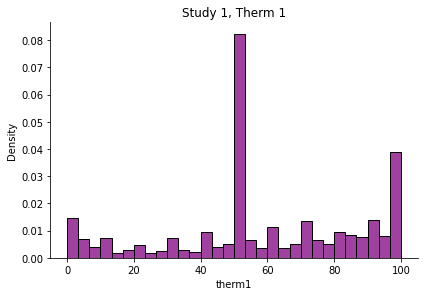

In [11]:
# the wave-1 feeling thermometer from study 1
sns.displot(
    data=gayr.loc[gayr['study'] == 1]['therm1'],
    stat='density', color='purple',
    height=4, aspect=1.5
).set(title='Study 1, Therm 1')

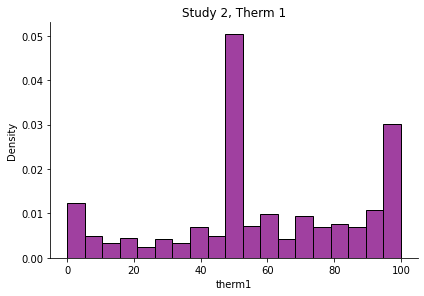

In [12]:
# the wave-1 feeling thermometer from study 2
sns.displot(
    data=gayr.loc[gayr['study'] == 2]['therm1'],
    stat='density', color='purple',
    height=4, aspect=1.5
).set(title='Study 2, Therm 1')

### Question 5

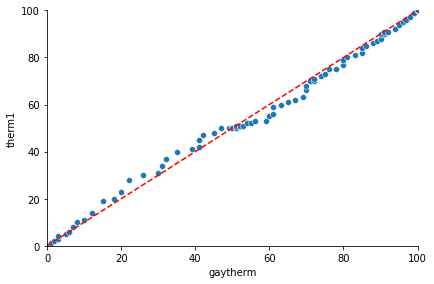

In [13]:
# Use qqplot to conduct the same comparison as in the previous question

# qq plot for2012 CCAP feeling thermometer and the wave-1 feeling thermometer from study 1
quantiles = np.linspace(0, 1, 101)

ccapq = ccap['gaytherm'].quantile(quantiles)
gayr1q =  gayr.loc[gayr['study'] == 1]['therm1'].quantile(quantiles)

sns.relplot(
    x = ccapq, y = gayr1q, height=4, aspect=1.5
).set(xlabel='gaytherm', ylabel='therm1',  xlim=(0, 100), ylim=(0,100))

plt.gca().axline((0,0), slope=1, color='red', linestyle='--')


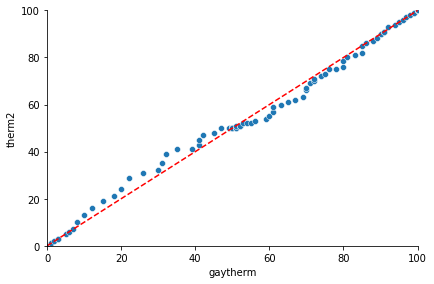

In [14]:
# qq plot for2012 CCAP feeling thermometer and the wave-1 feeling thermometer from study 2
quantiles = np.linspace(0, 1, 101)

ccapq = ccap['gaytherm'].quantile(quantiles)
gayr1q =  gayr.loc[gayr['study'] == 2]['therm1'].quantile(quantiles)

sns.relplot(
    x = ccapq, y = gayr1q, height=4, aspect=1.5
).set(xlabel='gaytherm', ylabel='therm2', xlim=(0, 100), ylim=(0,100))

plt.gca().axline((0,0), slope=1, color='red', linestyle='--')